In [1]:
from chainer import Link, Chain, ChainList, Variable, optimizers, iterators
import chainer.functions as F
import chainer.links as L
from chainer import cuda
from chainer import initializers
from chainer import serializers

import time
import matplotlib.pyplot as plt
%matplotlib inline
import coordinate
import data
from model import Oplus, Generator
import xp_settings as settings
settings.set_gpu(0)
xp = settings.xp

In [2]:
def plot_path(cart_path,target,xlim=[-5,5],ylim=[-5,5]):
    path = cart_path[0,:,:]
    target = target[0,:,:]
    if(settings.gpu_index >= 0):
        path = xp.asnumpy(path)
        target = xp.asnumpy(target)
    for i in range(1,len(path)):
        plt.quiver(path[i-1,0],path[i-1,1]
                   , path[i,0]-path[i-1,0],path[i,1]-path[i-1,1]
                   , scale_units='xy', angles='xy', scale=1,color="blue")
    plt.scatter(target[:,0],target[:,1],c="red",s=80,marker="o")
    num_step = len(target)
    #plt.scatter(t[num_step-1,0],t[num_step-1,1],c="yellow",s=500,marker="*")
    plt.xlabel("x[m]")
    plt.ylabel("y[m]")
    plt.axis('scaled')
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])
    plt.grid()
    plt.show()

In [3]:
print('Sample 1 : Single Data')
sample_oplus = Oplus()
sample_x1 = Variable(xp.array([[1, 1, 1]], dtype = 'float32'))
sample_x2 = Variable(xp.array([[1, 2, 0]], dtype = 'float32'))
sample_z = sample_oplus(sample_x1,sample_x2)
print(sample_z)
sample_z = sample_z * xp.array([1., 1., 0], dtype='float32')
sample_e = F.matmul(sample_z, F.transpose(sample_z))
print(sample_e)
#sample_e.backward()

Sample 1 : Single Data
variable([[-0.14263976  2.9220755   1.0000002 ]])
variable([[8.558871]])


Sample 2 : Single Data 2
variable([[0.49999997 0.86602545 1.0471976 ]])
variable([[-8.9406967e-08  1.7320509e+00  2.0943949e+00]])
variable([[-0.5000001  1.732051   3.1415923]])
[[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 4.9999997e-01  8.6602545e-01  1.0471976e+00]
  [-8.9406967e-08  1.7320509e+00  2.0943949e+00]
  [-5.0000012e-01  1.7320510e+00  3.1415923e+00]]]


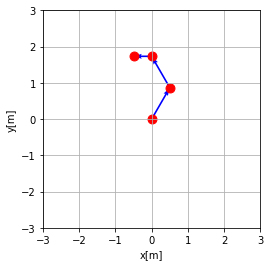

In [4]:
print('Sample 2 : Single Data 2')
sample_oplus = Oplus()
sample_x1 = Variable(xp.array([[0, 0, 0]], dtype = 'float32'))
sample_x2 = Variable(xp.array([[1, 0, xp.pi/3]], dtype = 'float32'))
sample_x3 = Variable(xp.array([[1, 0, xp.pi/3]], dtype = 'float32'))
sample_x4 = Variable(xp.array([[0.5, 0, xp.pi/3]], dtype = 'float32'))
sample_z1 = sample_oplus(sample_x1,sample_x2)
print(sample_z1)
sample_z2 = sample_oplus(sample_z1,sample_x3)
print(sample_z2)
sample_z3 = sample_oplus(sample_z2,sample_x4)
print(sample_z3)
pathes = xp.array([xp.vstack((sample_x1.data,sample_z1.data,sample_z2.data,sample_z3.data))],dtype='float32')
print(pathes)
plot_path(pathes,pathes,[-3,3],[-3,3])

In [5]:
print('Sample 3 : Mini-batch Data')
sample_oplus = Oplus()
# minibatch data
sample_x = Variable(xp.array([
    [1., 0., xp.pi/2],
    [1., 0., xp.pi/2],
    [1., 0., xp.pi/2],
    ], dtype = 'float32'))
sample_x_d = Variable(xp.array([
    [1., 0., xp.pi/2],
    [1., 0., xp.pi/2],
    [0.5, 0., xp.pi/2]
    ], dtype = 'float32'))
sample_z = sample_oplus(sample_x,sample_x_d)
print(sample_z)
sample_z = sample_z * xp.array([1., 1., 0], dtype='float32')
print(sample_z)
sample_e = F.matmul(sample_z ,F.transpose(sample_z))
print(sample_e)
sample_e.backward()

Sample 3 : Mini-batch Data
variable([[ 0.0000000e+00 -8.7422777e-08 -3.1415927e+00]
          [ 0.0000000e+00 -8.7422777e-08 -3.1415927e+00]
          [ 5.0000000e-01 -4.3711388e-08 -3.1415927e+00]])
variable([[ 0.000000e+00 -8.742278e-08 -0.000000e+00]
          [ 0.000000e+00 -8.742278e-08 -0.000000e+00]
          [ 5.000000e-01 -4.371139e-08 -0.000000e+00]])
variable([[7.642742e-15 7.642742e-15 3.821371e-15]
          [7.642742e-15 7.642742e-15 3.821371e-15]
          [3.821371e-15 3.821371e-15 2.500000e-01]])


AttributeError: 'NoneType' object has no attribute 'dtype'

In [ ]:
# dataset
DATA_SIZE = 1000
DATA_WAYPOINTS = 3
DATA_STEP = 3
X = np.empty()
x = data.make_arc_path_2(1,)

In [ ]:
# training
model = Generator(DATA_WAYPOINTS,DATA_STEP)

def train(model,mini_batch,epoch):
    pass

def loss_function():
    pass